In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
df = pd.read_csv("/content/temp_india.csv")
df.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,16.6354,1991,Jan Average,India,IND
1,19.9880,1991,Feb Average,India,IND
2,24.1397,1991,Mar Average,India,IND
3,27.3468,1991,Apr Average,India,IND
4,30.1960,1991,May Average,India,IND


In [3]:
df.tail()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
307,26.8598,2016,Aug Average,India,IND
308,26.7470,2016,Sep Average,India,IND
309,25.3020,2016,Oct Average,India,IND
310,21.2987,2016,Nov Average,India,IND
311,18.8905,2016,Dec Average,India,IND


In [10]:
train_set = []
test_set = []
i=0
while(df[' Year'][i]<2012):
  train_set.append(df['Temperature - (Celsius)'][i])
  i+=1
j=i
while(j<311):
  test_set.append(df['Temperature - (Celsius)'][j])
  j+=1
print(len(train_set),len(test_set))

252 59


In [17]:
df_train_set = DataFrame(train_set,columns=['train_set'])

In [25]:
X_train = []
y_train = []
for i in range(12,252):
    X_train.append(df_train_set['train_set'][i-12:i])
    y_train.append(df_train_set['train_set'][i]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [37]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'RMSprop', loss = 'mean_squared_error')


In [ ]:
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

In [39]:
df_test_set = DataFrame(test_set,columns=['test_set'])

In [40]:
X_test = []
y_test = []
for i in range(12,59):
    X_test.append(df_test_set['test_set'][i-12:i])
    y_test.append(df_test_set['test_set'][i]) 
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [41]:
predicted_temperature = regressor.predict(X_test)

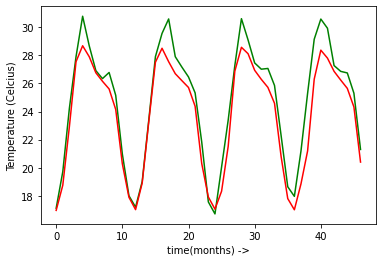

In [44]:
plt.xlabel("time(months) ->")
plt.ylabel("Temperature (Celcius)")
plt.plot(y_test,color='green')
plt.plot(predicted_temperature,color='red')